**Гущин Александр, 202 группа ВМК**
---

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import random
import copy
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time

In [211]:
class My_KMeans():
    def __init__(self, k, X, alg='random'):
        self.k = k
        self.e = 10**-7
        self.X = X
        self.alg = alg
        self.centroid = self.get_centroids()
    
    def get_centroids(self):
        y = self.X[:self.k]
        
        if self.alg == 'sum':
            y[0] = self.X[random.randint(0, self.X.shape[0]-1)]
            for i in range(1, self.k):       # пока не выбраны все центроиды
                max, new_c = 0, 0
                for j, e in enumerate(self.X): # по всем точкам
                    cur = 0
                    for k in range(i):    # расст до ближ кластера
                        cur += sp.spatial.distance.euclidean(e, y[k])
                    if (cur > max):
                        max = cur
                        new_c = j
                y[i] = self.X[new_c]
        elif self.alg == 'random':
            for i in range (self.k):
                c = random.randint(0, self.X.shape[0] - 1)
                while (self.X[c] in y):
                    c = random.randint(0, self.X.shape[0] - 1)
                y[i] = self.X[c]
        else:
            y[0] = self.X[random.randint(0, self.X.shape[0]-1)]
            for i in range(1, self.k):       # пока не выбраны все центроиды
                max, new_c = 0, 0
                for j, e in enumerate(self.X): # по всем точкам
                    min_dist = min(sp.spatial.distance.cdist([e], y[:i].tolist())[0])
                    if (min_dist > max):
                        max = min_dist
                        new_c = e
                y[i] = new_c
                
        return y
    
    def predict(self):
        
        self.gh = []
        self.y, self.y1 = np.ones(self.X.shape[0], dtype = float), np.ones(self.X.shape[0], dtype = float)
        min_loss, cur_loss = 10**5, 10**5
        for j in range (10):
            dist = 1
            self.c = self.get_centroids()
            while (dist > self.e):
                self.y = self.choose_cluster()
                dist = self.move_c(self.y)
            self.gh.append(self.y)
            cur_loss = self.loss_func(self.y)
            if (cur_loss < min_loss):
                min_loss = copy.copy(cur_loss)
                self.y1 = copy.deepcopy(self.y)
        return self.y1
        
    def choose_cluster(self):
        yq = np.ones(self.X.shape[0], dtype = float)
        
        for i, x in enumerate(self.X):
            h = sp.spatial.distance.cdist([x], self.centroid.tolist())
            k = np.argmin(h)
            yq[i] = k
            
        return yq
    
    def move_c(self, y):
        min_dist = 0
        for i in range(self.k):
            cl = np.array([e for j, e in enumerate(self.X) if y[j] == i]) #choose objects in this cluster
            
            old_c = copy.deepcopy(self.centroid[i])
            self.centroid[i] = np.sum(cl, axis=0) / cl.shape[0]
            buf = old_c - self.centroid[i]  
            cur_dist = np.linalg.norm(old_c - self.centroid[i])
            
            min_dist += cur_dist
        return min_dist
        
    def loss_func(self, y):
        loss = 0
        for i in range(self.k):
            cl = np.array([e for j, e in enumerate(self.X) if y[j] == i]) #choose objects in this cluster
            
            if len(cl) > 0:
                h = sp.spatial.distance.cdist(cl.tolist(), [self.centroid[i]])
                loss += sum(h)
        return loss[0]
    
    def pairwise(self, y):
        count = []
        hj, count = np.unique(y, return_counts=True)
        count = zip(hj, count)
        count = sorted(count, key = lambda s: s[1])#сортируем кластеры по размеру
        print(count)
        for j, i in enumerate(count):
            for h in y:
                if h == i[0]:
                    h = str(j)
        
        sort = [[y[i], self.X[i]] for i in range(len(y)-1)]
        sorted_x = sorted(sort, key = lambda s: s[0])
        s = [k[1] for k in sorted_x]
        return sklearn.metrics.pairwise_distances(s)
    
    def image(self, data, k1, k2):
        k = []
        for h in d:
            j = [[int(f * k1), int(f * k1), int(f * k2)] for f in h]
            k.append(j)
        return k

**Проверим работу на датасете make_blobs**
---

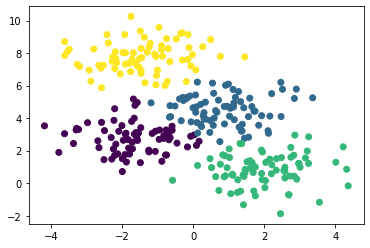

In [159]:
centers = 4
X, y = make_blobs(n_samples=300, n_features=2, centers=centers, random_state=0)
a = KMeans(n_clusters=centers, random_state=0).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = a)

In [181]:
a = My_KMeans(centers, X, 'farest_points')
b = a.predict()

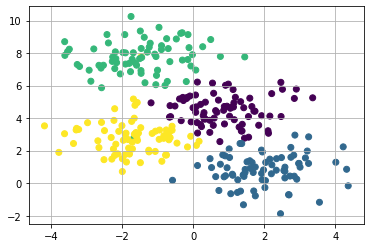

In [182]:
plt.scatter(X[:, 0], X[:, 1], c = b)
plt.grid()

In [183]:
k1, k2 = 40, 60
d = a.pairwise(b)
k = a.image(d, k1, k2)

[(2.0, 73), (3.0, 74), (1.0, 76), (0.0, 77)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


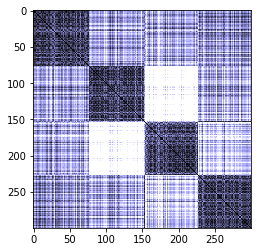

In [184]:
plt.imshow(k, interpolation='nearest')
plt.show()

**Сделаем тоже самое на другом датасете, выбирая центры кластеров случайным образом**
------

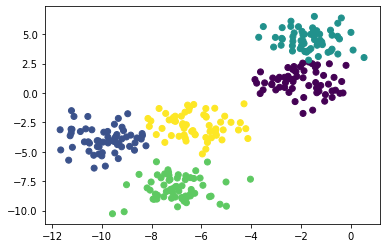

In [185]:
centers = 5
X, y = make_blobs(n_samples=300, n_features=2, centers=centers, random_state=1)
a = KMeans(n_clusters=centers, random_state=0).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = a)

In [195]:
a = My_KMeans(centers, X, 'random')
b = a.predict()

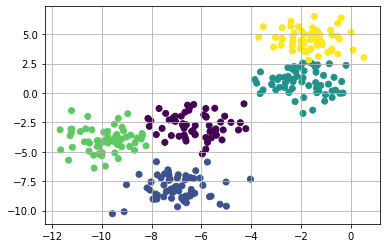

In [196]:
plt.scatter(X[:, 0], X[:, 1], c = b)
plt.grid()

In [197]:
k1, k2 = 40, 60
d = a.pairwise(b)
k = a.image(d, k1, k2)

[(0.0, 59), (4.0, 59), (2.0, 60), (1.0, 61), (3.0, 61)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


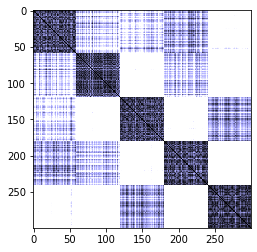

In [198]:
plt.imshow(k, interpolation='nearest')
plt.show()

**Используем на датасете IRIS**
-----

In [396]:
import mnist # subroutines for fetching the MNIST dataset
from sklearn import datasets
iris_df = datasets.load_iris()

In [401]:
a = My_KMeans(3, iris_df['data'], 'rando')
b = a.predict()

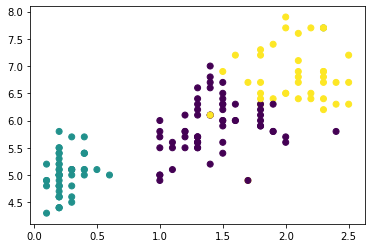

In [399]:
x_axis = iris_df.data[:, 3]  # Sepal Length
y_axis = iris_df.data[:, 0]  # Sepal Width
plt.scatter(x_axis, y_axis, c=b)
plt.show()

In [369]:
d = a.pairwise(b)
k = a.image(d)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


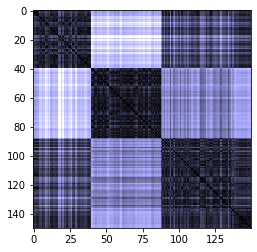

In [371]:
plt.imshow(k, interpolation='nearest')
plt.show()

**Сделаем кластеризацию для объекта более сложной формы - 2 синусоид и окружности**
----

In [283]:
x = np.random.ranf([1000])*10
y = np.sin(x) + np.random.ranf([1000])/2
y[::2] -= 1
d = np.array([[x[i], y[i]] for i in range(len(x)-1)])

In [284]:
a = My_KMeans(3, d, 'random')
b = a.predict()

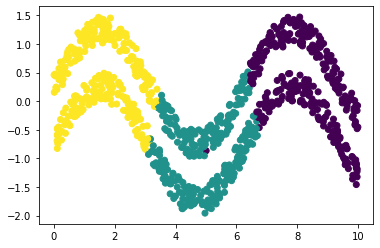

In [285]:
plt.scatter(d[:, 0], d[:, 1], c=b)

Как видно, данный алгоритм плохо справляется с такими данными, чем более шарообразен кластер - тем лучше

In [334]:
x = np.random.ranf([400])
x[::2] *= -1
y = np.array([(1-i*i)**0.5 for i in x]) + np.random.ranf([400])/10
y[::3] *= -1
d = np.array([[x[i], y[i]] for i in range(len(x)-1)])

In [339]:
a = My_KMeans(3, d, 'random')
b = a.predict()

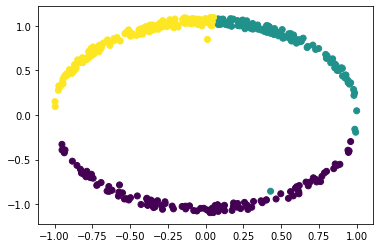

In [340]:
plt.scatter(d[:, 0], d[:, 1], c=b)